# **Dataset**

In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d ananthu017/emotion-detection-fer

Dataset URL: https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer
License(s): CC0-1.0
100% 65.0M/65.2M [00:00<00:00, 669MB/s]
100% 65.2M/65.2M [00:00<00:00, 665MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/emotion-detection-fer.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

train_data = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=64,
    image_size=(224, 224),
    color_mode='grayscale'
)

test_data = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=64,
    image_size=(224, 224),
    color_mode='grayscale'
)


Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


In [6]:
class_names = train_data.class_names
class_names

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

In [7]:
for images, labels in train_data.take(1):
    print(images.shape)

(64, 224, 224, 1)


In [8]:
def convert_grayscale_to_rgb(image, label):
    image = tf.image.grayscale_to_rgb(image)
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Apply to datasets
train_data = train_data.map(convert_grayscale_to_rgb)
test_data = test_data.map(convert_grayscale_to_rgb)

In [9]:
for images, labels in train_data.take(1):
    print(images.shape)

(64, 224, 224, 3)


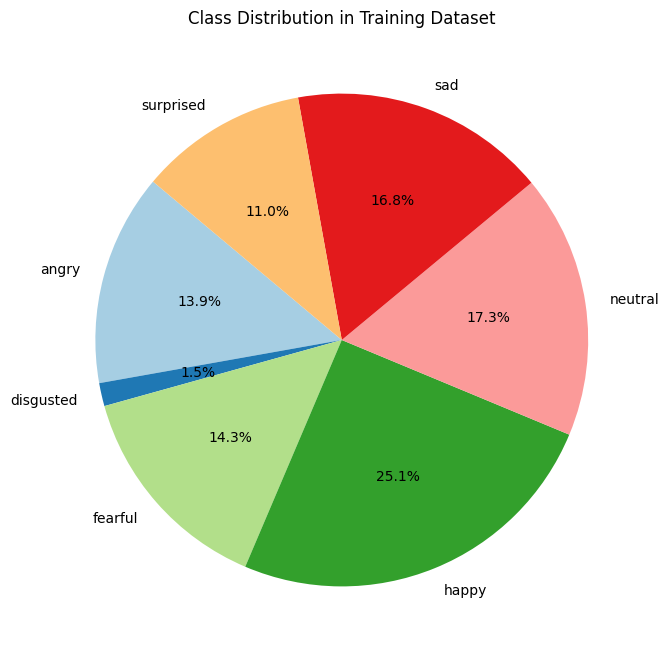

In [10]:
import matplotlib.pyplot as plt
import numpy as np

num_classes = len(class_names)

# Count occurrences of each class in the training dataset
class_counts = np.zeros(num_classes)
for images, labels in train_data:
    for label in labels.numpy():
        class_counts[label] += 1

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_names, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Class Distribution in Training Dataset")
plt.show()


In [11]:
disgusted_index = class_names.index("disgusted")
print(disgusted_index)

1


# **Data Augmentation**

In [12]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

save_aug = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

source_dir = '/content/train'
save_dir = '/content/augmented_disgusted'

# Check and create folder if not exists
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Create generator
save_generator = save_aug.flow_from_directory(
    source_dir,
    classes=['disgusted'],
    target_size=(224, 224),
    batch_size=1,
    save_to_dir=save_dir,
    save_prefix='disgusted_aug',
    save_format='png'
)

# Generate and save 3000 images
total_images = 3000
for i in range(total_images):
    next(save_generator)


Found 436 images belonging to 1 classes.


In [13]:
folder_path = '/content/augmented_disgusted'

# Count only files (skip any subfolders if any)
image_count = len([
    f for f in os.listdir(folder_path)
    if os.path.isfile(os.path.join(folder_path, f))
])

print(f"otal images in '{folder_path}': {image_count}")


otal images in '/content/augmented_disgusted': 3000


In [14]:
import os
import shutil

# Source: Augmented images folder
augmented_dir = '/content/augmented_disgusted'

# Destination: Disgusted training folder
train_disgusted_dir = '/content/train/disgusted'

# Make sure the destination folder exists
os.makedirs(train_disgusted_dir, exist_ok=True)

# Move each file
for filename in os.listdir(augmented_dir):
    src_path = os.path.join(augmented_dir, filename)
    dst_path = os.path.join(train_disgusted_dir, filename)

    # Check if it's a file before moving
    if os.path.isfile(src_path):
        shutil.copy(src_path, dst_path)

print("All augmented images copied to:", train_disgusted_dir)

All augmented images copied to: /content/train/disgusted


In [15]:
train_data = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=64,
    image_size=(224, 224),
    color_mode='grayscale'
)

test_data = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=64,
    image_size=(224, 224),
    color_mode='grayscale'
)

Found 31709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


In [16]:
for images, labels in train_data.take(1):
    print(images.shape)

(64, 224, 224, 1)


In [17]:
def convert_grayscale_to_rgb(image, label):
    image = tf.image.grayscale_to_rgb(image)
    image = tf.cast(image, tf.float32)
    return image, label

train_data = train_data.map(convert_grayscale_to_rgb)
test_data = test_data.map(convert_grayscale_to_rgb)

In [18]:
for images, labels in train_data.take(1):
    print(images.shape)

(64, 224, 224, 3)


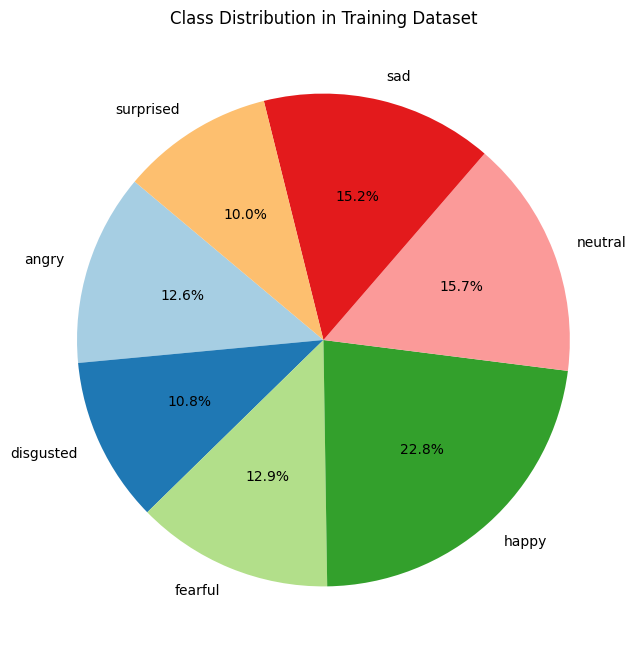

In [19]:
import matplotlib.pyplot as plt
import numpy as np

num_classes = len(class_names)

# Count occurrences of each class in the training dataset
class_counts = np.zeros(num_classes)
for images, labels in train_data:
    for label in labels.numpy():
        class_counts[label] += 1

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_names, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Class Distribution in Training Dataset")
plt.show()


In [20]:
first_image, first_label = next(iter(train_data))

print(first_image)
print(first_label)

tf.Tensor(
[[[[144.       144.       144.      ]
   [144.       144.       144.      ]
   [144.       144.       144.      ]
   ...
   [144.9643   144.9643   144.9643  ]
   [145.       145.       145.      ]
   [145.       145.       145.      ]]

  [[144.       144.       144.      ]
   [144.       144.       144.      ]
   [144.       144.       144.      ]
   ...
   [144.9643   144.9643   144.9643  ]
   [145.       145.       145.      ]
   [145.       145.       145.      ]]

  [[144.03572  144.03572  144.03572 ]
   [144.03572  144.03572  144.03572 ]
   [144.03572  144.03572  144.03572 ]
   ...
   [144.9273   144.9273   144.9273  ]
   [144.96428  144.96428  144.96428 ]
   [144.96428  144.96428  144.96428 ]]

  ...

  [[133.0357   133.0357   133.0357  ]
   [133.0357   133.0357   133.0357  ]
   [133.06888  133.06888  133.06888 ]
   ...
   [ 97.42221   97.42221   97.42221 ]
   [ 99.24996   99.24996   99.24996 ]
   [ 99.24996   99.24996   99.24996 ]]

  [[133.       133.       133.    

# **Data Normalization**

In [21]:
from tensorflow.keras.applications.resnet import preprocess_input

train_data = train_data.map(lambda x, y: (preprocess_input(x), y))
test_data = test_data.map(lambda x, y: (preprocess_input(x), y))

# **ResNet50**

In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

base_model.trainable = False

num_classes = 7

inputs = layers.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model = models.Model(inputs, outputs)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [23]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [24]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,114,055 (91.99 MB)

 Trainable params: 526,343 (2.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=7,
    restore_best_weights=True,
    verbose=1
)

In [28]:
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=30,
    callbacks=[early_stop]
)

Epoch 1/30
496/496 ━━━━━━━━━━━━━━━━━━━━ 160s 287ms/step - accuracy: 0.3111 - loss: 2.0056 - val_accuracy: 0.4234 - val_loss: 1.5811
Epoch 2/30
496/496 ━━━━━━━━━━━━━━━━━━━━ 164s 230ms/step - accuracy: 0.4323 - loss: 1.4747 - val_accuracy: 0.4678 - val_loss: 1.4974
Epoch 3/30
496/496 ━━━━━━━━━━━━━━━━━━━━ 113s 228ms/step - accuracy: 0.4677 - loss: 1.3908 - val_accuracy: 0.4897 - val_loss: 1.4429
Epoch 4/30
496/496 ━━━━━━━━━━━━━━━━━━━━ 113s 227ms/step - accuracy: 0.4856 - loss: 1.3556 - val_accuracy: 0.4969 - val_loss: 1.4029
Epoch 5/30
496/496 ━━━━━━━━━━━━━━━━━━━━ 112s 226ms/step - accuracy: 0.4971 - loss: 1.3240 - val_accuracy: 0.5004 - val_loss: 1.3795
Epoch 6/30
496/496 ━━━━━━━━━━━━━━━━━━━━ 112s 225ms/step - accuracy: 0.5058 - loss: 1.3005 - val_accuracy: 0.5109 - val_loss: 1.3627
Epoch 7/30
496/496 ━━━━━━━━━━━━━━━━━━━━ 112s 224ms/step - accuracy: 0.5142 - loss: 1.2842 - val_accuracy: 0.5176 - val_loss: 1.3368
Epoch 8/30
496/496 ━━━━━━━━━━━━━━━━━━━━ 144s 228ms/step - accuracy: 0.5182 -

In [30]:
model.save('FER.keras')

## Prediction

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import tensorflow as tf

In [31]:
def preprocess_new_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224), color_mode='grayscale')
    img_array = image.img_to_array(img)  # shape: (224, 224, 1)
    img_array = tf.image.grayscale_to_rgb(img_array)  # convert to (224, 224, 3)
    img_array = tf.cast(img_array, tf.float32)
    img_array = preprocess_input(img_array)  # ResNet50 preprocessing
    img_array = np.expand_dims(img_array, axis=0)  # shape: (1, 224, 224, 3)
    return img_array

def predict_image(img_path):
    processed_img = preprocess_new_image(img_path)
    pred = model.predict(processed_img)
    predicted_label = np.argmax(pred)
    return predicted_label

In [41]:
class_names

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

In [49]:
def preprocess_new_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224), color_mode='grayscale')
    img_array = image.img_to_array(img)  # shape: (224, 224, 1)
    img_array = tf.convert_to_tensor(img_array)  # Convert to tensor
    img_array = tf.image.grayscale_to_rgb(img_array)  # Convert to (224, 224, 3)
    img_array = tf.cast(img_array, tf.float32)
    img_array = preprocess_input(img_array)  # Preprocessing for ResNet50
    img_array = tf.expand_dims(img_array, axis=0)  # Add batch dimension: (1, 224, 224, 3)
    return img_array

def predict_image(img_path):
    processed_img = preprocess_new_image(img_path)
    pred = model.predict(processed_img)

    predicted_label = np.argmax(pred[0])  # Get class index

    # Display image with prediction
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {class_names[predicted_label]}")
    plt.show()

    return class_names[predicted_label], confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


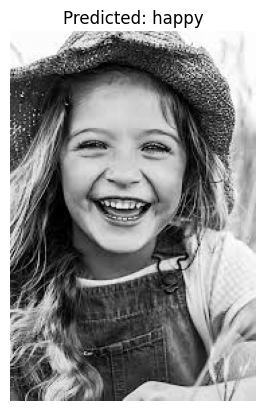

Predicted class index: ('happy', np.float32(0.33265904))


In [74]:
img_path = '/content/happy.jpeg'
print("Predicted class index:", predict_image(img_path))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


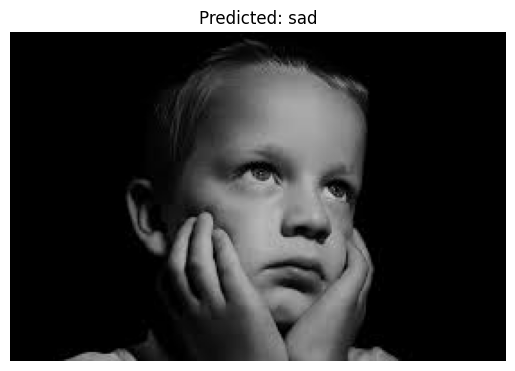

Predicted class index: ('sad', np.float32(0.4080198))


In [65]:
img_path = '/content/sad.jpeg'
print("Predicted class index:", predict_image(img_path))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


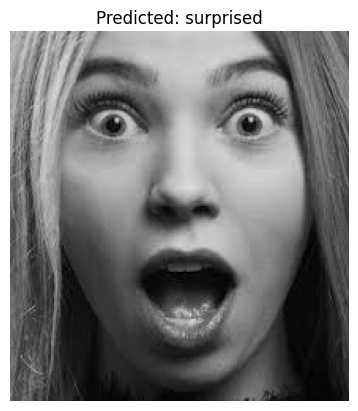

Predicted class index: ('surprised', np.float32(0.28134665))


In [59]:
img_path = '/content/surprised.jpeg'
print("Predicted class index:", predict_image(img_path))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


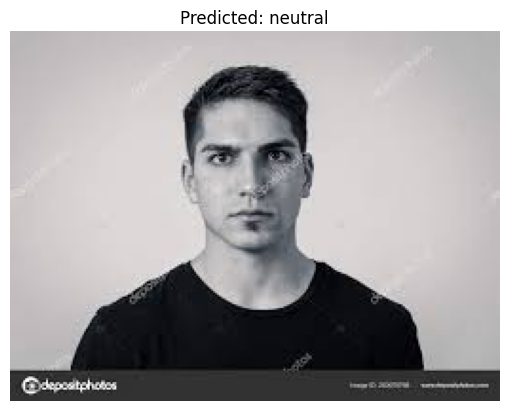

('neutral', np.float32(0.49437508))

In [88]:
img_path = '/content/neutral.jpeg'
predict_image(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


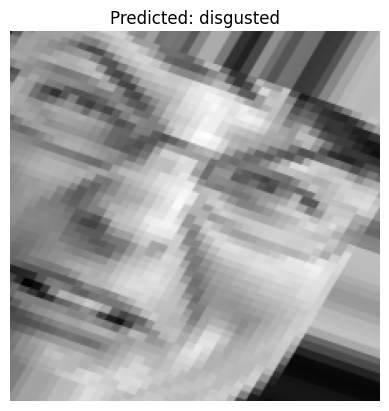

('disgusted', np.float32(1.0))

In [68]:
img_path = '/content/augmented_disgusted/disgusted_aug_0_6384237.png'
predict_image(img_path)